Problem Statement No. 04

Consider the Bangalore House Price Data. Perform following operations.
1. Find and replace null values in the data using appropriate technique.
1. Transform the ‘Size’ column to numerical values. For Example: 2 BHK to be converted as 2
1. Transform the ‘total_sqft’ column to contain numerical values on same scale. If the range is given average value of the range to be taken.
1. Calculate and add one more column as ‘Price_Per_Sqft’
1. Remove the outliers from Price_Per_Sqft and BHK Size column if any.
1. Apply the Linear Regression model to the data and display the training and testing performance measures as Mean Squared Error and Accuracy


In [48]:
import pandas as pd
import numpy as np

In [150]:
df = pd.read_csv("Datasets/Banglore Housing Prices.csv")

In [151]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [152]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [153]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [154]:
df["bath"] = df["bath"].apply(lambda x: np.nan if pd.isnull(x) else x).isnull()

In [155]:
df["bath"].fillna(df["bath"].mean()).isnull().sum()

0

In [156]:
df["bath"].fillna(df["bath"].mean() , inplace=True)

In [157]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [158]:
df.dropna(inplace=True)

In [159]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

----
###  Transform the ‘Size’ column to numerical values. For Example: 2 BHK to be converted as 2


In [160]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,False,39.07
1,Chikka Tirupathi,4 Bedroom,2600,False,120.00
2,Uttarahalli,3 BHK,1440,False,62.00
3,Lingadheeranahalli,3 BHK,1521,False,95.00
4,Kothanur,2 BHK,1200,False,51.00


In [161]:
df["size"] = df["size"].apply(lambda x: int(x.split()[0]))

In [162]:
df["size"] = df["size"].astype("int")

In [163]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,False,39.07
1,Chikka Tirupathi,4,2600,False,120.00
2,Uttarahalli,3,1440,False,62.00
3,Lingadheeranahalli,3,1521,False,95.00
4,Kothanur,2,1200,False,51.00


In [164]:
df.describe()

,size,price
count,13303.000000,13303.000000
mean,2.803728,112.584033
std,1.295022,148.993820
min,1.000000,8.000000
25%,2.000000,50.000000
50%,3.000000,72.000000
75%,3.000000,120.000000
max,43.000000,3600.000000


## Transform the ‘total_sqft’ column to contain numerical values on same scale. If the range is given average value of the range to be taken

In [165]:
df["total_sqft"].apply(lambda x: )

SyntaxError: invalid syntax (591452116.py, line 1)

In [166]:
for i in df["total_sqft"]:
    if len(i.split()) >1 and len(i.split()) != 3:
        print(i.split())

['34.46Sq.', 'Meter']
['1000Sq.', 'Meter']
['1100Sq.', 'Yards']
['716Sq.', 'Meter']
['1500Sq.', 'Meter']
['142.61Sq.', 'Meter']
['1574Sq.', 'Yards']
['361.33Sq.', 'Yards']
['117Sq.', 'Yards']
['3040Sq.', 'Meter']
['500Sq.', 'Yards']
['167Sq.', 'Meter']
['315Sq.', 'Yards']
['188.89Sq.', 'Yards']
['204Sq.', 'Meter']
['45Sq.', 'Yards']
['133.3Sq.', 'Yards']
['78.03Sq.', 'Meter']
['122Sq.', 'Yards']
['84.53Sq.', 'Meter']
['697Sq.', 'Meter']
['142.61Sq.', 'Meter']
['132Sq.', 'Yards']
['1100Sq.', 'Meter']
['151.11Sq.', 'Yards']
['2940Sq.', 'Yards']
['45.06Sq.', 'Meter']
['86.72Sq.', 'Meter']
['120Sq.', 'Yards']
['24Sq.', 'Meter']
['142.84Sq.', 'Meter']
['300Sq.', 'Yards']


In [167]:
for i in df["total_sqft"]:
    if len(i.split()) == 2 and i.split()[1] == "Yards":
        print(i.split())

['1100Sq.', 'Yards']
['1574Sq.', 'Yards']
['361.33Sq.', 'Yards']
['117Sq.', 'Yards']
['500Sq.', 'Yards']
['315Sq.', 'Yards']
['188.89Sq.', 'Yards']
['45Sq.', 'Yards']
['133.3Sq.', 'Yards']
['122Sq.', 'Yards']
['132Sq.', 'Yards']
['151.11Sq.', 'Yards']
['2940Sq.', 'Yards']
['120Sq.', 'Yards']
['300Sq.', 'Yards']


In [168]:
def stringFilter(num):
    ret = ''.join(filter(str.isdigit, num))
    return ret
stringFilter("asd1dfg1")

'11'

In [169]:
# sq yards to sq foot
# 1 sq yard = 9 sq foot
df["total_sqft"] = df["total_sqft"].apply(lambda x: stringFilter(x.split()[0])*9 if len(x.split())==2 and x.split()[1] == 'Yards' else x)

In [170]:
for i in df["total_sqft"]:
    if len(i.split()) == 2 and i.split()[1] == "Yards":
        print(i.split())

In [171]:
for i in df["total_sqft"]:
    if len(i.split()) == 2 and i.split()[1] == "Meter":
        print(i.split())

['34.46Sq.', 'Meter']
['1000Sq.', 'Meter']
['716Sq.', 'Meter']
['1500Sq.', 'Meter']
['142.61Sq.', 'Meter']
['3040Sq.', 'Meter']
['167Sq.', 'Meter']
['204Sq.', 'Meter']
['78.03Sq.', 'Meter']
['84.53Sq.', 'Meter']
['697Sq.', 'Meter']
['142.61Sq.', 'Meter']
['1100Sq.', 'Meter']
['45.06Sq.', 'Meter']
['86.72Sq.', 'Meter']
['24Sq.', 'Meter']
['142.84Sq.', 'Meter']


In [172]:
# sq meter to sq foot
# 1 sq yard = 10.7639104 sq foot
df["total_sqft"] = df["total_sqft"].apply(lambda x: stringFilter(x.split()[0]) if len(x.split()) == 2 and x.split()[1] == "Meter" else x)

In [173]:
for i in df["total_sqft"]:
    if len(i.split()) == 2 and i.split()[1] == "Meter":
        print(i.split())

In [174]:
for i in df["total_sqft"]:
    if len(i.split()) >1 and len(i.split()) != 3:
        print(i.split())

In [175]:
for i in df["total_sqft"]:
    if len(i.split()) == 3:
        print(i.split())

['2100', '-', '2850']
['3010', '-', '3410']
['2957', '-', '3450']
['3067', '-', '8156']
['1042', '-', '1105']
['1145', '-', '1340']
['1015', '-', '1540']
['1520', '-', '1740']
['1195', '-', '1440']
['1120', '-', '1145']
['4400', '-', '6640']
['3090', '-', '5002']
['4400', '-', '6800']
['1160', '-', '1195']
['4000', '-', '5249']
['1115', '-', '1130']
['520', '-', '645']
['1000', '-', '1285']
['3606', '-', '5091']
['650', '-', '665']
['633', '-', '666']
['1445', '-', '1455']
['884', '-', '1116']
['850', '-', '1093']
['1440', '-', '1884']
['547.34', '-', '827.31']
['580', '-', '650']
['3425', '-', '3435']
['1804', '-', '2273']
['3630', '-', '3800']
['660', '-', '670']
['4000', '-', '5249']
['620', '-', '933']
['2695', '-', '2940']
['3450', '-', '3472']
['1250', '-', '1305']
['670', '-', '980']
['1005.03', '-', '1252.49']
['3630', '-', '3800']
['1004', '-', '1204']
['645', '-', '936']
['2710', '-', '3360']
['2249.81', '-', '4112.19']
['3436', '-', '3643']
['2830', '-', '2882']
['596', '-',

In [176]:
df["total_sqft"] = df["total_sqft"].apply(lambda x: str((float(x.split()[0]) + float(x.split()[2])) / 2 ) if len(x.split()) == 3 else x)

In [177]:
for i in df["total_sqft"]:
    if len(i.split()) == 3:
        print(i.split())

In [178]:
for i in df["total_sqft"]:
    if len(i.split()) != 1:
        print(i.split())

In [179]:
df["total_sqft"] = df["total_sqft"].apply(lambda x: stringFilter(x))

In [180]:
df["total_sqft"] = df["total_sqft"].astype("float")

In [181]:
df.dtypes

location       object
size            int32
total_sqft    float64
bath             bool
price         float64
dtype: object

In [182]:
df["total_sqft"] = df["total_sqft"].apply(lambda x: round(x,2))

In [183]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,False,39.07
1,Chikka Tirupathi,4,2600.0,False,120.00
2,Uttarahalli,3,1440.0,False,62.00
3,Lingadheeranahalli,3,1521.0,False,95.00
4,Kothanur,2,1200.0,False,51.00


In [184]:
df["Price_Per_Sqft"] = df["total_sqft"]/df["price"]

## Calculate and add one more column as ‘Price_Per_Sqft’

In [185]:
df

,location,size,total_sqft,bath,price,Price_Per_Sqft
0,Electronic City Phase II,2,1056.0,False,39.07,27.028411
1,Chikka Tirupathi,4,2600.0,False,120.00,21.666667
2,Uttarahalli,3,1440.0,False,62.00,23.225806
3,Lingadheeranahalli,3,1521.0,False,95.00,16.010526
4,Kothanur,2,1200.0,False,51.00,23.529412
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,False,231.00,14.948052
13316,Richards Town,4,3600.0,False,400.00,9.000000
13317,Raja Rajeshwari Nagar,2,1141.0,False,60.00,19.016667
13318,Padmanabhanagar,4,4689.0,False,488.00,9.608607


In [186]:
df.describe()

,size,total_sqft,price,Price_Per_Sqft
count,13303.000000,1.330300e+04,13303.000000,1.330300e+04
mean,2.803728,5.272021e+40,112.584033,2.552118e+38
std,1.295022,3.769799e+42,148.993820,1.713641e+40
min,1.000000,1.000000e+00,8.000000,8.333333e-03
25%,2.000000,1.100000e+03,50.000000,1.376526e+01
50%,3.000000,1.286000e+03,72.000000,1.859091e+01
75%,3.000000,1.703000e+03,120.000000,2.386486e+01
max,43.000000,3.613336e+44,3600.000000,1.338273e+42


In [187]:
df.total_sqft.max()

3.613336133361334e+44

In [188]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x217a94e0bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x217a94e0640>,
 'boxes': [<matplotlib.lines.Line2D at 0x217a94e0790>],
 'medians': [<matplotlib.lines.Line2D at 0x217a94e00a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x217a94e3280>],
 'means': []}

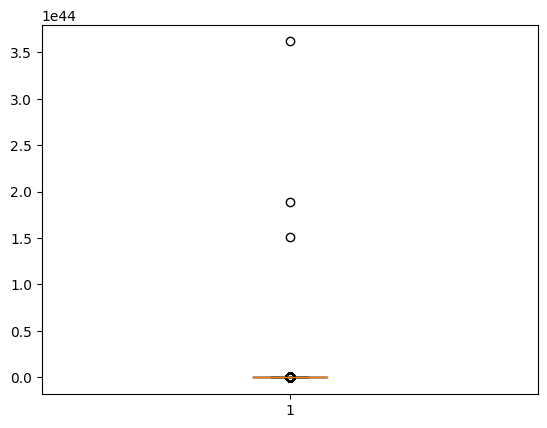

In [189]:
plt.boxplot(df.total_sqft)

In [190]:
new = df[df["total_sqft"] < 100000000]

{'whiskers': [<matplotlib.lines.Line2D at 0x217a9459120>,
 'caps': [<matplotlib.lines.Line2D at 0x217a9459870>,
 'boxes': [<matplotlib.lines.Line2D at 0x217a9458df0>],
 'medians': [<matplotlib.lines.Line2D at 0x217a9459f30>],
 'fliers': [<matplotlib.lines.Line2D at 0x217a945a170>],
 'means': []}

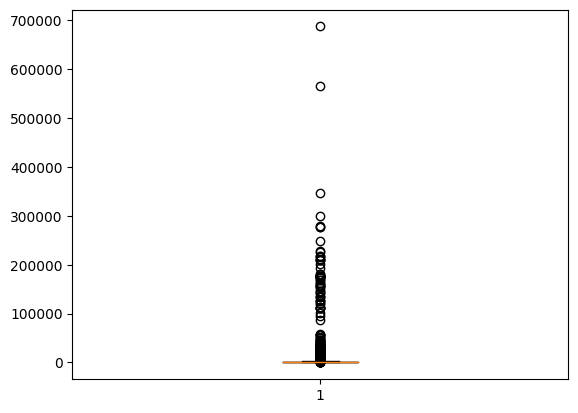

In [191]:
plt.boxplot(new.total_sqft)

In [192]:
new["total_sqft"].max()

687325.0

In [193]:
new.describe()

,size,total_sqft,price,Price_Per_Sqft
count,13288.000000,13288.000000,13288.000000,13288.000000
mean,2.803507,2694.222306,112.524187,30.397892
std,1.295329,14496.989998,149.015452,181.730393
min,1.000000,1.000000,8.000000,0.008333
25%,2.000000,1100.000000,50.000000,13.759850
50%,3.000000,1285.000000,72.000000,18.578465
75%,3.000000,1700.250000,120.000000,23.846154
max,43.000000,687325.000000,3600.000000,16089.068352


{'whiskers': [<matplotlib.lines.Line2D at 0x217ac55dab0>,
 'caps': [<matplotlib.lines.Line2D at 0x217ac55dff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217ac55d810>],
 'medians': [<matplotlib.lines.Line2D at 0x217ac55e530>],
 'fliers': [<matplotlib.lines.Line2D at 0x217ac55e7d0>],
 'means': []}

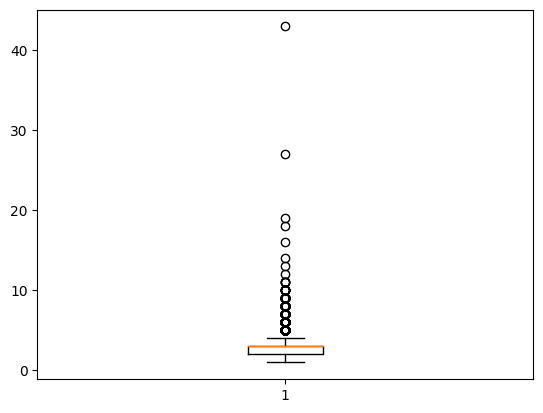

In [195]:
plt.boxplot(new["size"])

In [196]:
new = new[new["size"] < 11]

{'whiskers': [<matplotlib.lines.Line2D at 0x217ac597c70>,
 'caps': [<matplotlib.lines.Line2D at 0x217ac5c41f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217ac5979d0>],
 'medians': [<matplotlib.lines.Line2D at 0x217ac5c4730>],
 'fliers': [<matplotlib.lines.Line2D at 0x217ac5c49d0>],
 'means': []}

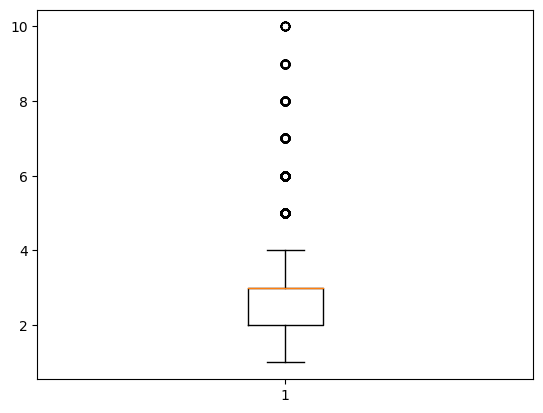

In [197]:
plt.boxplot(new["size"])

##  Apply the Linear Regression model to the data and display the training and testing performance measures as Mean Squared Error and Accuracy


In [198]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [199]:
new.head()

,location,size,total_sqft,bath,price,Price_Per_Sqft
0,Electronic City Phase II,2,1056.0,False,39.07,27.028411
1,Chikka Tirupathi,4,2600.0,False,120.00,21.666667
2,Uttarahalli,3,1440.0,False,62.00,23.225806
3,Lingadheeranahalli,3,1521.0,False,95.00,16.010526
4,Kothanur,2,1200.0,False,51.00,23.529412


In [204]:
# Define features and target variable
X = new[['size', 'total_sqft','bath']]
y = new['Price_Per_Sqft']

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=4)

In [241]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [242]:
# Make predictions
y_pred = model.predict(X_test)

In [243]:
# Calculate performance measures
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [244]:
print(f'Mean Squared Error: {mse}')
print(f'Accuracy (R-squared): {r2}')

Mean Squared Error: 16363.516013814873
Accuracy (R-squared): 0.5422870640979103
